In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf

Reading the Data

In [ ]:
stock_symbol, start_date, end_date = 'RIVN', '2022-08-25', '2023-08-25'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-25,32.889999,33.369999,32.581001,32.900002,32.900002,8968400
2022-08-26,32.820000,33.860001,31.440001,32.110001,32.110001,10728700
2022-08-29,31.600000,33.259998,31.549999,32.310001,32.310001,8517300
2022-08-30,32.740002,33.040001,31.445000,31.889999,31.889999,8541000
2022-08-31,32.549999,33.139999,31.760000,32.709999,32.709999,19332800
...,...,...,...,...,...,...
2023-08-18,20.250000,21.170000,20.180000,20.780001,20.780001,25477700
2023-08-21,20.860001,21.320000,20.740000,21.180000,21.180000,21257500
2023-08-22,21.379999,21.469999,19.770000,20.080000,20.080000,30521700


# General Statistical info

In [ ]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,22.268526,22.953267,21.527841,22.220239,22.220239,2.990959e+07
std,8.011030,8.234868,7.722938,7.990259,7.990259,2.604730e+07
min,12.150000,12.275000,11.680000,12.000000,12.000000,3.907600e+06
25%,14.710000,15.210000,14.345000,14.635000,14.635000,1.511000e+07
50%,19.980000,20.570000,19.434999,19.910000,19.910000,2.258340e+07
75%,30.099999,31.247499,29.060000,29.620000,29.620000,3.359980e+07
max,39.799999,40.860001,38.889999,40.099998,40.099998,2.312002e+08


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-25 to 2023-08-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Text(0.5, 0, '')

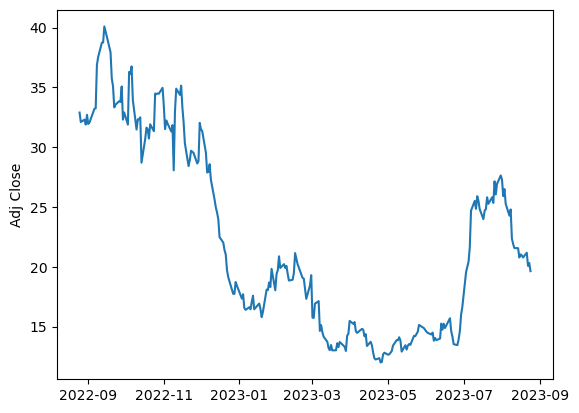

In [ ]:
# Let's see a historical view of the closing price
import matplotlib.pyplot as plt
plt.plot(stock_data['Adj Close'])
plt.ylabel('Adj Close')
plt.xlabel(None)

Text(0.5, 0, '')

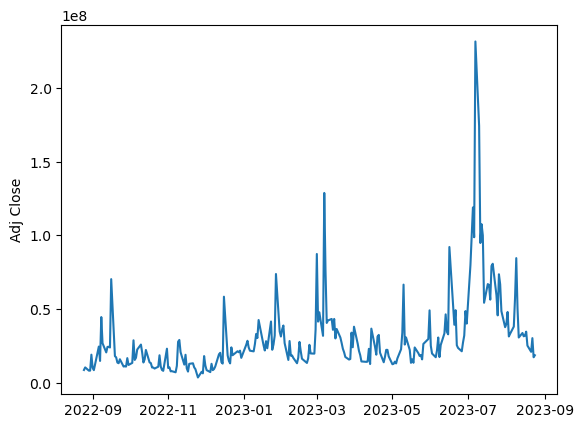

In [ ]:
# Let's see a historical view of the closing price
import matplotlib.pyplot as plt
plt.plot(stock_data['Volume'])
plt.ylabel('Adj Close')
plt.xlabel(None)

Moving average of the various stocks

<Axes: xlabel='Date'>

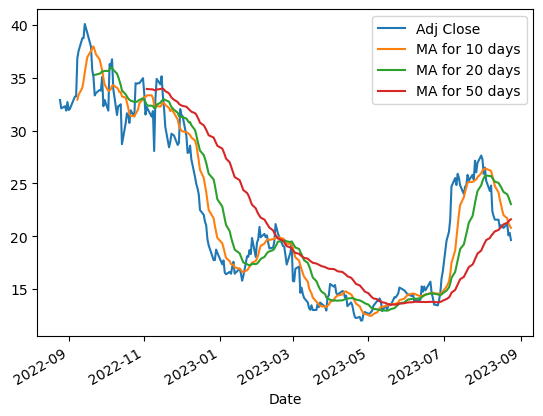

In [ ]:
my_day = [10, 20, 50]

for day in my_day:

  column_name = f"MA for {day} days"
  stock_data[column_name] = stock_data['Adj Close'].rolling(day).mean()
stock_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()


Daily return of the stock on average

<Axes: xlabel='Date'>

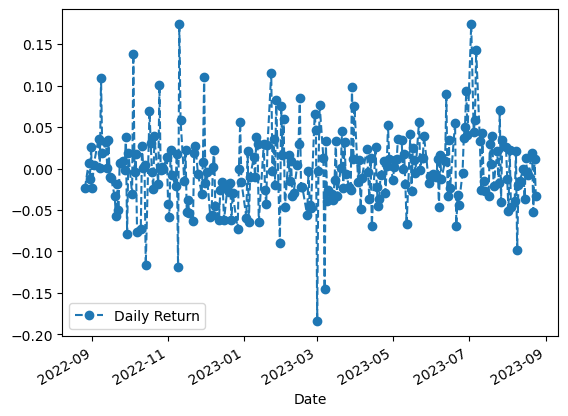

In [ ]:

stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()


stock_data['Daily Return'].plot(legend=True, linestyle='--', marker='o')


 Average daily return using a histogram

Text(0, 0.5, 'Counts')

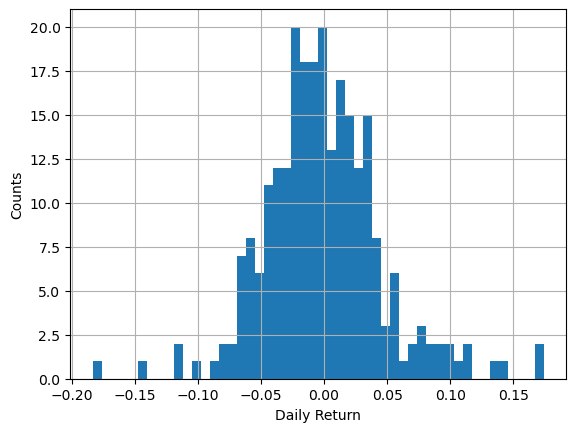

In [ ]:

stock_data['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')

In [ ]:
# Create a new dataframe with only the 'Close column
data = stock_data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

239

Scale the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.74377234],
       [0.71565842],
       [0.72277589],
       [0.7078292 ],
       [0.73701068],
       [0.70996448],
       [0.7142349 ],
       [0.75516023],
       [0.7562278 ],
       [0.88540934],
       [0.90925269],
       [0.95160153],
       [0.95231316],
       [1.        ],
       [0.98540926],
       [0.97010675],
       [0.92313167],
       [0.84519578],
       [0.82206405],
       [0.75907484],
       [0.76725988],
       [0.77758006],
       [0.77544491],
       [0.82135242],
       [0.72277589],
       [0.74412815],
       [0.7078292 ],
       [0.8647687 ],
       [0.85871895],
       [0.88113878],
       [0.78113886],
       [0.69323846],
       [0.72348765],
       [0.72419927],
       [0.72953741],
       [0.59466192],
       [0.66548049],
       [0.6989324 ],
       [0.69395022],
       [0.66654806],
       [0.70889684],
       [0.68825627],
       [0.80035598],
       [0.79857651],
       [0.80071179],
       [0.80000003],
       [0.81743781],
       [0.764

Creating the scaled training data set

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.74377234, 0.71565842, 0.72277589, 0.7078292 , 0.73701068,
       0.70996448, 0.7142349 , 0.75516023, 0.7562278 , 0.88540934,
       0.90925269, 0.95160153, 0.95231316, 1.        , 0.98540926,
       0.97010675, 0.92313167, 0.84519578, 0.82206405, 0.75907484,
       0.76725988, 0.77758006, 0.77544491, 0.82135242, 0.72277589,
       0.74412815, 0.7078292 , 0.8647687 , 0.85871895, 0.88113878,
       0.78113886, 0.69323846, 0.72348765, 0.72419927, 0.72953741,
       0.59466192, 0.66548049, 0.6989324 , 0.69395022, 0.66654806,
       0.70889684, 0.68825627, 0.80035598, 0.79857651, 0.80071179,
       0.80000003, 0.81743781, 0.76441284, 0.69466198, 0.7202848 ,
       0.71138793, 0.68754451, 0.70640575, 0.57188614, 0.74590748,
       0.81494672, 0.79644136, 0.82384352, 0.75871889, 0.7142349 ])]
[0.6526690800171486]

[array([0.74377234, 0.71565842, 0.72277589, 0.7078292 , 0.73701068,
       0.70996448, 0.7142349 , 0.75516023, 0.7562278 , 0.88540934,
       0.90925269, 0.95160153, 0.952

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
6/6 [==============================] - 10s 35ms/step - loss: 0.0328
Epoch 2/10
6/6 [==============================] - 0s 43ms/step - loss: 0.0112
Epoch 3/10
6/6 [==============================] - 0s 42ms/step - loss: 0.0098
Epoch 4/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0071
Epoch 5/10
6/6 [==============================] - 0s 31ms/step - loss: 0.0068
Epoch 6/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0054
Epoch 7/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0047
Epoch 8/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0042
Epoch 9/10
6/6 [==============================] - 0s 34ms/step - loss: 0.0038
Epoch 10/10
6/6 [==============================] - 0s 31ms/step - loss: 0.0038


Create the testing data set

In [ ]:

test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.7025752262907892

C:\Users\mramk\AppData\Local\Temp\ipykernel_12952\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


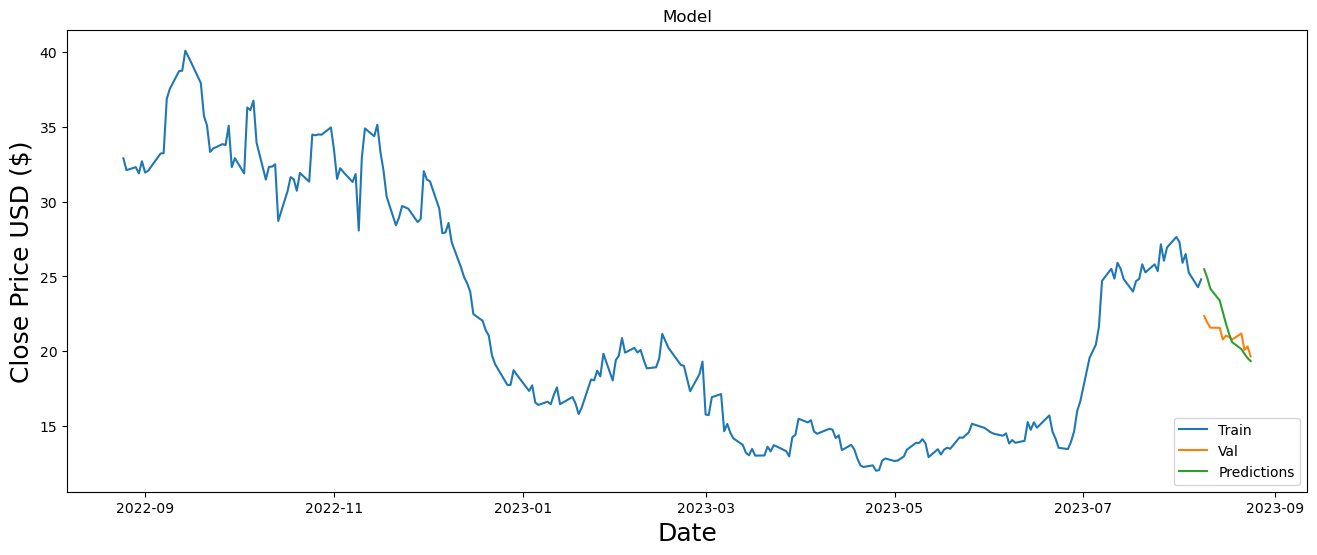

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()